In [8]:
from generator_numba import DataGenerator
import numpy as np

In [9]:
class FPUTGenerator(DataGenerator):
    def __init__(self, num_masses = 20):
        self.ddr = np.array()
        self.dr = np.array()
        self.r = np.array()
        self.num_masses = num_masses
        
    def N(self, j, r):
        if j%2:
            return
        else:
            return

    def eom(self, t, u):
        ## coefficients:
        r, dr = u
        #lets say we have 20 masses
        
        for j in range(self.num_masses):
        ##eom
            k1 = -2*(self.kappa*r[2*j+1] + self.beta * r[2*j+1]**2 + r[2*j+1]**3*self.N(1, r[2*j+1]))
            k2 = (r[2*j+2] + r[2*j+2]**2 + r[2*j+2]**3*self.N(2, r[2*j+2]))
            k3 = (r[2*j] + r[2*j]**2 + r[2*j]**3*self.N(2, r[2*j]))
            self.ddr[2*j+1] = k1 + k2 + k3
        
            l1 = -2*(r[2*j] + r[2*j]**2 + r[2*j]**3*self.N(2, r[2*j]))
            l2 = (self.kappa*r[2*j+1] + self.beta*r[2*j+1]**2 + r[2*j+1]**3*self.N(1, r[2*j+1]))
            l3 = (self.kappa*r[2*j-1] + self.beta*r[2*j-1]**2 + r[2*j-1]**3*self.N(1, r[2*j-1]))
            self.ddr[2*j] = l1 + l2 + l3
        
        
        return np.array([dr, ddr])
        

In [10]:
from scipy.integrate import ode

In [27]:
def N(j, r):
    return np.sin(r)

def eom(t, y):
    print(y)
    ## coefficients:
    r, dr = y
    kappa = 1
    beta = 1
    
    #lets say we have 20 masses
        
    for j in range(10):
    ##eom
        k1 = -2*(kappa*r[2*j+1] + beta * r[2*j+1]**2 + r[2*j+1]**3*N(1, r[2*j+1]))
        k2 = (r[2*j+2] + r[2*j+2]**2 + r[2*j+2]**3*N(2, r[2*j+2]))
        k3 = (r[2*j] + r[2*j]**2 + r[2*j]**3*N(2, r[2*j]))
        ddr[2*j+1] = k1 + k2 + k3
        
        l1 = -2*(r[2*j] + r[2*j]**2 + r[2*j]**3*N(2, r[2*j]))
        l2 = (kappa*r[2*j+1] + beta*r[2*j+1]**2 + r[2*j+1]**3*N(1, r[2*j+1]))
        l3 = (kappa*r[2*j-1] + beta*r[2*j-1]**2 + r[2*j-1]**3*N(1, r[2*j-1]))
        ddr[2*j] = l1 + l2 + l3
        
        
    return np.array([dr, ddr])

In [32]:
from numpy import concatenate, linspace, random, mod, zeros, sin
from scipy.integrate import odeint

Nosc = 20
assert mod(Nosc, 2) == 0

def f(theta, _):
    N = int(theta.size / 2)
    x, y = theta[:N], theta[N:]
    m = 0.95
    K = 1.0
    fx = zeros(N, float)
    for i in range(N):
        s = 0.0
        for j in range(i + 1, N):
            s = s + sin(x[j] - x[i])
        fx[i] = (-y[i] + (K * s) / N) / m
    return concatenate(([y, fx]))

t = linspace(0, 10, 50, endpoint=False)

theta = random.uniform(-180, 180, Nosc)
theta2 = random.uniform(-180, 180, Nosc) #added initial condition for the velocities of the oscillators

yinit = concatenate((theta, theta2))

res = odeint(f, yinit, t)
X = res[:, :Nosc].T
Y = res[:, Nosc:].T

<ipython-input-33-b8531453a21d>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


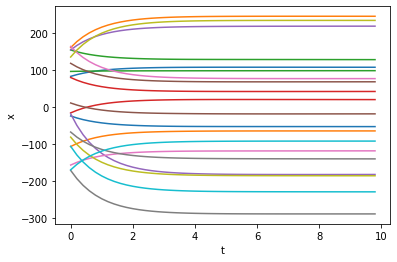

In [33]:
import matplotlib.pylab as plt

fig, ax = plt.subplots()
for displacement in X:
    ax.plot(t, displacement)
ax.set_xlabel('t')
ax.set_ylabel('x')
fig.show()
    

In [29]:
r = ode(eom).set_integrator('zvode', method='bdf')

In [30]:
y0 = np.array([0,0])
t0 = 0
r.set_initial_value(t0, y0)#.set_f_params(2.0).set_jac_params(2.0)

t1 = 10

dt = 1



print(r.t+dt, r.integrate(r.t+dt))

[0.+0.j]


ValueError: not enough values to unpack (expected 2, got 1)